# Auto MPG 

## Overview
The Auto-MPG dataset for regression analysis. The target (y) is defined as the miles per gallon (mpg) for 392 automobiles. The 8 feature columns are:

### Features

cylinders: multi-valued discrete

displacement: continuous

horsepower: continuous

weight: continuous

acceleration: continuous

model year: multi-valued discrete

origin: multi-valued discrete

car name: string (unique for each instance)

Number of samples: 392

Target variable (continuous): mpg

#### References
Source: https://archive.ics.uci.edu/ml/datasets/Auto+MPG
Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.

## Problem Statement:
    The data contains the MPG (Mile Per Gallon) variable which is continuous data and tells us about the efficiency of fuel consumption of a vehicle in the 70s and 80s.
    
Our aim here is to predict the MPG value for a vehicle, given that we have other attributes of that vehicle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import mean_squared_error,r2_score
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
#pd.pandas.set_option("display.max_colwidth", None)

In [2]:
df = pd.read_csv("Data/auto_mpg_dataset.csv", sep=",")

print("Shape:", df.shape)
df.head()

Shape: (398, 9)


,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0


## 1. Explore the dataset and gain the insights of the data

### 1.1 Data Structure Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    float64
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car_name      398 non-null    object 
 8   mpg           398 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


This data set contains:
3 - Integer features
5 - Float features
1- string Features
And there are no null values 

In [4]:
df.isnull().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
mpg             0
dtype: int64

In [5]:
# Check for duplicates
df.duplicated().sum()

0

In [6]:
df.describe(include = "all")

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398,398.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford pinto,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN
mean,5.454774,193.425879,-1404.643216,2970.424623,15.568090,76.010050,1.572864,NaN,23.514573
std,1.701004,104.269838,12213.424763,846.841774,2.757689,3.697627,0.802055,NaN,7.815984
min,3.000000,68.000000,-100000.000000,1613.000000,8.000000,70.000000,1.000000,NaN,9.000000
25%,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,NaN,17.500000
50%,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000,NaN,23.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,NaN,29.000000


### 1.2 Missing Values

In [7]:
##checking for all the null values
df.isna().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
mpg             0
dtype: int64

In [8]:
## check the percentage of null values present in each feature
feature_na =[feature for feature in df.columns if df[feature].isnull().sum() > 0]

for feature in feature_na:
    print(feature, np.round(df[feature].isnull().mean(),4)*100, " % missing values")

### 1.3 Data Preprocessing
##### Feature wie value counts and distributions

In [9]:
df_f = pd.DataFrame([])
lst_dict = []
for feature in df.columns:
    #print("Count:{}\n{}\n" .format(feature,df[feature].value_counts()))
    #print("Count %: {}\n{}\n" .format(feature,df[feature].value_counts()/len(df)))
    if(len(df[feature].unique())) <= 5:        
        lst_dict.append({
                "Feature": feature,
                "Count": len(df[feature].unique()),
                "Unique Values": list(df[feature].unique())
               })    

df_f = pd.DataFrame(lst_dict)
df_f

#for feature in df.columns:
    #print('{}, Unique Count: {}\n {}\n'.format(feature, len(df[feature].unique()), df[feature].unique()))

,Feature,Count,Unique Values
0,cylinders,5,"[8, 4, 6, 3, 5]"
1,origin,3,"[1, 3, 2]"


##### Observation: 
The features Cylinders and Origin have fewer values (which only have a few categories of values), so these columns can be treated as Categorical features.

In [10]:
df["cylinders"] = df["cylinders"].astype(str)
df["origin"] = df["origin"]. astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    object 
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    float64
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    object 
 7   car_name      398 non-null    object 
 8   mpg           398 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 28.1+ KB


To better organize our data, let's divide our features into two types: 
1) categorical 

2) numerical.

In [11]:
# Capture the Categorical features from the data
feature_cat = [feature for feature in df.columns if df[feature].dtype == "O"]
print("Categorical Features: ",feature_cat)

# Capture the Numerical features from the data
feature_num = [feature for feature in df.columns if df[feature].dtype != "O"]
print("Numerical Features: ",feature_num)

Categorical Features:  ['cylinders', 'origin', 'car_name']
Numerical Features:  ['displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'mpg']


Check the Categorical feature wise item counts.

Looking at the distribution of the values among these categories will tell us how the data is distributed:

In [12]:
#pip install tabulate
#from tabulate import tabulate

##category distribution
for feature in feature_cat:  
    dict = {feature:df[feature].unique(),
            "Count":list(df[feature].value_counts()),
            "Count %": list(df[feature].value_counts()/len(df) * 100)}
    
    print(tabulate(pd.DataFrame(dict), headers = 'keys', tablefmt = 'psql'))

+----+-------------+---------+-----------+
|    |   cylinders |   Count |   Count % |
|----+-------------+---------+-----------|
|  0 |           8 |     204 | 51.2563   |
|  1 |           4 |     103 | 25.8794   |
|  2 |           6 |      84 | 21.1055   |
|  3 |           3 |       4 |  1.00503  |
|  4 |           5 |       3 |  0.753769 |
+----+-------------+---------+-----------+
+----+----------+---------+-----------+
|    |   origin |   Count |   Count % |
|----+----------+---------+-----------|
|  0 |        1 |     249 |   62.5628 |
|  1 |        3 |      79 |   19.8492 |
|  2 |        2 |      70 |   17.5879 |
+----+----------+---------+-----------+
+-----+--------------------------------------+---------+-----------+
|     | car_name                             |   Count |   Count % |
|-----+--------------------------------------+---------+-----------|
|   0 | chevrolet chevelle malibu            |       6 |  1.50754  |
|   1 | buick skylark 320                    |       5 | 

###### Observation:
We found that car_name column in data is not useful for model since there are very few car names which are repeated

But we can extract some information from that column such as Brand of the car

In [13]:
df["car_name"].values[:10]

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl'], dtype=object)

We can see a pattern among those names : Brand name, model, variant

Let's extract Brand information from car_name column

In [14]:
df["brand"] = df["car_name"].str.extract('(^.*?)\s')

#df["brand"].sample(10)

df["brand"].value_counts()[:10]

ford          51
chevrolet     43
plymouth      31
amc           28
dodge         28
toyota        25
datsun        23
buick         17
pontiac       16
volkswagen    15
Name: brand, dtype: int64

There are few brand names which are repeated but in different letters

for example: chevrolet is repeated as chevy,chevroelt etc.

So, Let's replace those brand names as basic brand name

In [15]:
df['brand'] = df['brand'].replace(['volkswagen','vokswagen','vw'],'VW')
df['brand'] = df['brand'].replace(['chevrolet','chevy','chevroelt'],'chevrolet')
df['brand'] = df['brand'].replace('maxda','mazda')
df['brand'] = df['brand'].replace('toyouta','toyota')
df['brand'] = df['brand'].replace('mercedes','mercedes-benz')
df['brand'] = df['brand'].replace('nissan','datsun')
df['brand'] = df['brand'].replace('capri','ford')
df['brand'] = df['brand'].replace('nissan','datsun')

In [16]:
#Checking for any null values in brand
df[df['brand'].isnull()]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
150,4,108.0,93.0,2391.0,15.5,74,3,subaru,26.0,NaN
346,4,97.0,67.0,2065.0,17.8,81,3,subaru,32.3,NaN


We found that there are two null values

We can fill those values with their car name "subaru"

In [17]:
df['brand'].fillna(value = 'subaru',inplace=True) 

df["brand"]=df["brand"].str.capitalize()

df.sample(10)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
388,4,156.0,92.0,2585.0,14.5,82,1,chrysler lebaron medallion,26.0,Chrysler
24,6,199.0,90.0,2648.0,15.0,70,1,amc gremlin,21.0,Amc
118,4,116.0,75.0,2158.0,15.5,73,2,opel manta,24.0,Opel
339,4,151.0,84.0,2635.0,16.4,81,1,buick skylark,26.6,Buick
236,4,140.0,89.0,2755.0,15.8,77,1,ford mustang ii 2+2,25.5,Ford
302,4,105.0,70.0,2150.0,14.9,79,1,plymouth horizon tc3,34.5,Plymouth
316,6,225.0,90.0,3381.0,18.7,80,1,dodge aspen,19.1,Dodge
158,8,318.0,150.0,4498.0,14.5,75,1,plymouth grand fury,16.0,Plymouth
28,8,304.0,193.0,4732.0,18.5,70,1,hi 1200d,9.0,Hi
156,8,400.0,170.0,4668.0,11.5,75,1,pontiac catalina,16.0,Pontiac


##### Checking the Origin Column
The Origin column about the origin of the vehicle has discrete values that look like the code of a country.

To add some complication and make it more explicit, I converted these numbers to strings.

In [18]:
def country(x):
    if x==1:
        return "India"
    elif x==2:
        return "USA"
    elif x==3:
        return "UK"

In [19]:
# revert Origin feature to Int for mapping 
df["origin"] = df["origin"].astype(int)
#
df["origincode"] = df["origin"].map({1:"India", 2: "USA", 3: "UK"})
#df["origincode"] = df["origin"].apply(country)

#df["origin"] = df["origin"].map({"1":"India", "2": "USA", "3": "UK"})
df.sample(10)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand,origincode
309,4,98.0,76.0,2144.0,14.7,80,2,vw rabbit,41.5,Vw,USA
131,4,71.0,65.0,1836.0,21.0,74,3,toyota corolla 1200,32.0,Toyota,UK
31,4,113.0,95.0,2228.0,14.0,71,3,toyota corona,25.0,Toyota,UK
295,4,98.0,80.0,1915.0,14.4,79,1,dodge colt hatchback custom,35.7,Dodge,India
255,4,140.0,88.0,2720.0,15.4,78,1,ford fairmont (man),25.1,Ford,India
371,4,135.0,84.0,2525.0,16.0,82,1,dodge aries se,29.0,Dodge,India
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0,Plymouth,India
154,6,250.0,72.0,3432.0,21.0,75,1,mercury monarch,15.0,Mercury,India
213,8,350.0,145.0,4055.0,12.0,76,1,chevy c10,13.0,Chevrolet,India
315,4,151.0,90.0,3003.0,20.1,80,1,amc concord,24.3,Amc,India


### 1.4. Plotting Variables

Relationship between independent and dependent feature

#### Count Plots for Categorical Variables
We have many categorical variables in our dataset and it was challenging to gain meaningful insights from them through manual inspection.
To better understand the distribution of our categorical data, we create a countplot for each categorical feature.

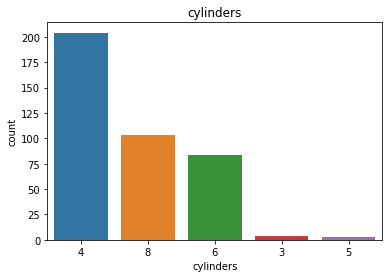

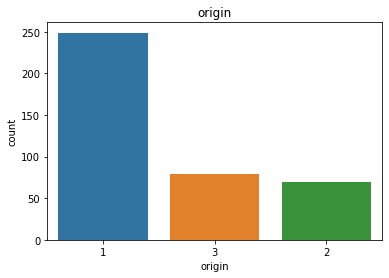

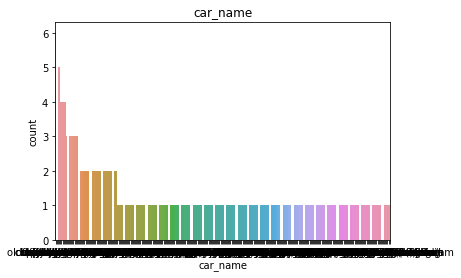

In [20]:
for feature in feature_cat:
    sns.countplot(x = feature, data = df, order = df[feature].value_counts().index[::1])
    plt.title(feature)
    plt.show()

#### Pair Plot
By creating a pair plot, we can identify potential correlations, see patterns and trends, and identify any outliers or anomalies.

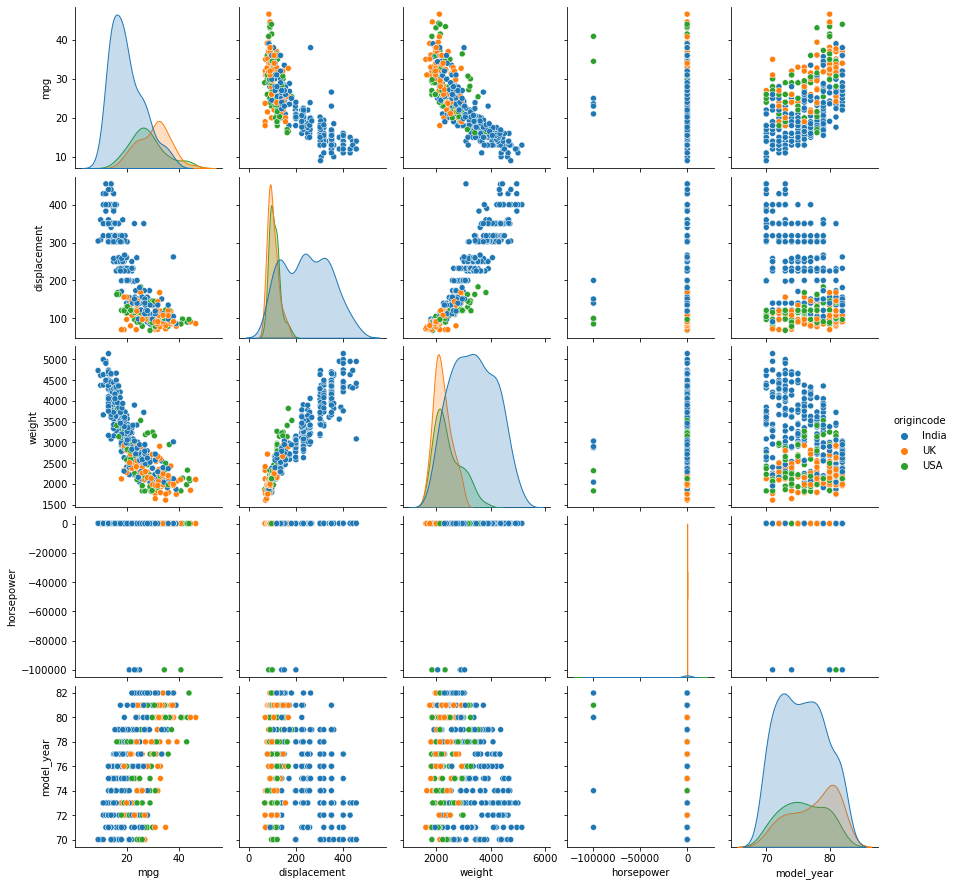

In [21]:
##pairplots to get an intuition of potential correlations
#print(df.columns)
#sns.pairplot(df[["mpg", "cylinders", "displacement", "weight", "horsepower"]], diag_kind="kde")
sns.pairplot(df[["mpg", "cylinders", "displacement", "weight", "horsepower","origincode", "model_year"]],hue="origincode")
#sns.pairplot(df, diag_kind="kde")

### Distplots for Numerical Variables
To explore the distribution of our numerical features, we'll use distplots instead of countplots, which are better suited for categorical data.

Countplot is used to visualize the frequency of categorical data, while distplot is used to visualize the distribution of continuous data.

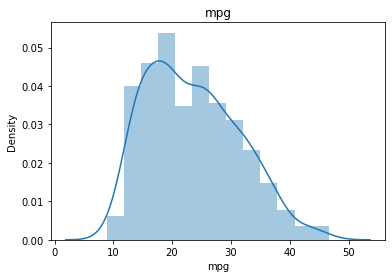

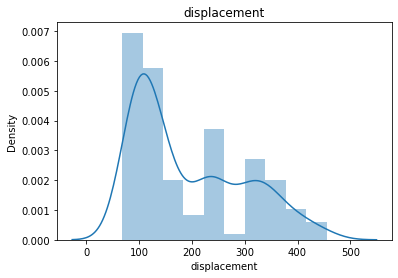

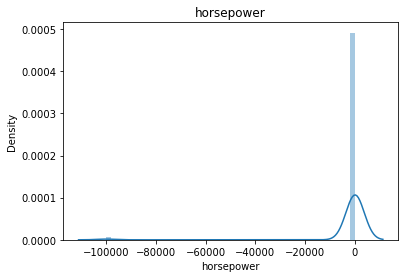

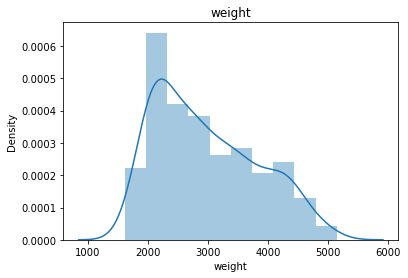

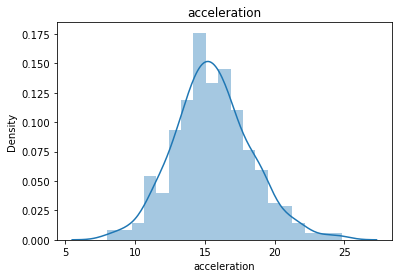

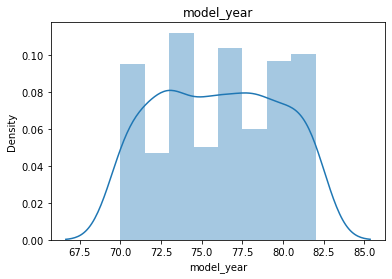

In [22]:
feature_num = ["mpg", "displacement", "horsepower", "weight", "acceleration", "model_year"]

for feature in feature_num: 
    sns.distplot(df[feature])
    plt.title(feature)
    plt.show()

##### Box Plot for Numerical Features

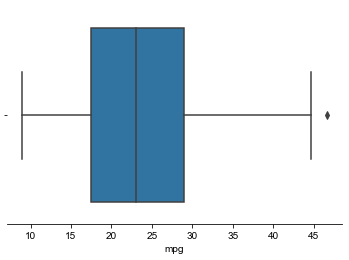

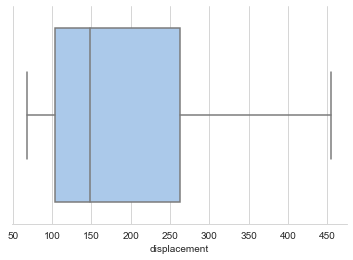

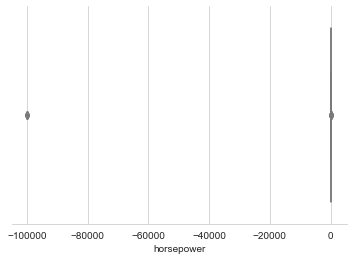

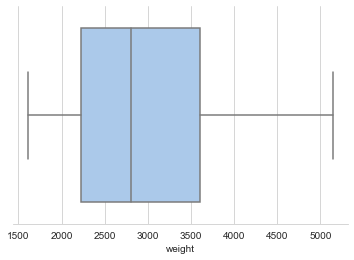

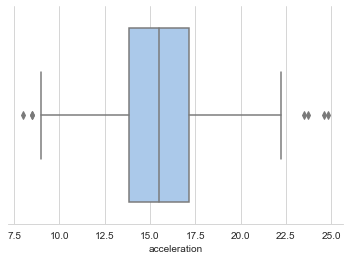

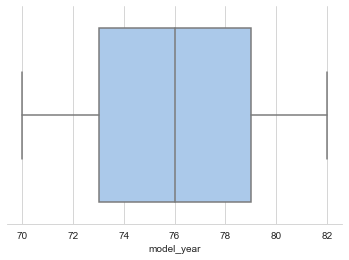

In [23]:
for feature in feature_num:
    
    sns.boxplot(x=feature, data=df)
    sns.set_style('whitegrid')
    sns.set_palette('pastel')
    sns.despine(left=True)

    plt.show()

##### Observation:
There is some issue with "horsepower" column

Few data points are plotted at -10000

These are the outliers in our data

Let's visualize that column little more

<AxesSubplot:>

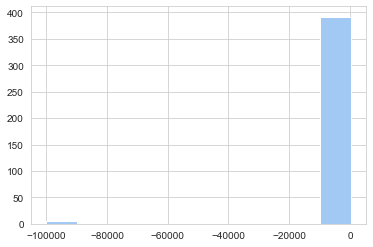

In [24]:
#Distribution of horsepower for all cars
df["horsepower"].hist()

In [25]:
#Range of horsepower
print("minimum value: {} \nmaximum value : {}".format(df["horsepower"].min(),df.horsepower.max()))

minimum value: -100000.0 
maximum value : 230.0


There are few data points which have horsepower as -10000

Let's get those data points

In [26]:
df[df["horsepower"]<=0]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand,origincode
32,4,98.0,-100000.0,2046.0,19.0,71,1,ford pinto,25.0,Ford,India
126,6,200.0,-100000.0,2875.0,17.0,74,1,ford maverick,21.0,Ford,India
330,4,85.0,-100000.0,1835.0,17.3,80,2,renault lecar deluxe,40.9,Renault,USA
336,4,140.0,-100000.0,2905.0,14.3,80,1,ford mustang cobra,23.6,Ford,India
354,4,100.0,-100000.0,2320.0,15.8,81,2,renault 18i,34.5,Renault,USA
374,4,151.0,-100000.0,3035.0,20.5,82,1,amc concord dl,23.0,Amc,India


In [27]:
df[df["car_name"]=="ford pinto"]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand,origincode
32,4,98.0,-100000.0,2046.0,19.0,71,1,ford pinto,25.0,Ford,India
112,4,122.0,85.0,2310.0,18.5,73,1,ford pinto,19.0,Ford,India
130,4,122.0,80.0,2451.0,16.5,74,1,ford pinto,26.0,Ford,India
168,4,140.0,83.0,2639.0,17.0,75,1,ford pinto,23.0,Ford,India
174,6,171.0,97.0,2984.0,14.5,75,1,ford pinto,18.0,Ford,India
206,4,140.0,72.0,2565.0,13.6,76,1,ford pinto,26.5,Ford,India


In [28]:
df[df["car_name"]=="ford maverick"]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand,origincode
17,6,200.0,85.0,2587.0,16.0,70,1,ford maverick,21.0,Ford,India
100,6,250.0,88.0,3021.0,16.5,73,1,ford maverick,18.0,Ford,India
126,6,200.0,-100000.0,2875.0,17.0,74,1,ford maverick,21.0,Ford,India
155,6,250.0,72.0,3158.0,19.5,75,1,ford maverick,15.0,Ford,India
193,6,200.0,81.0,3012.0,17.6,76,1,ford maverick,24.0,Ford,India


In [29]:
df[df["car_name"]=="renault lecar deluxe"]


,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand,origincode
330,4,85.0,-100000.0,1835.0,17.3,80,2,renault lecar deluxe,40.9,Renault,USA


In [30]:
df[df["car_name"]=="ford mustang cobra"]


,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand,origincode
336,4,140.0,-100000.0,2905.0,14.3,80,1,ford mustang cobra,23.6,Ford,India


In [31]:
df[df["car_name"]=="renault 18i"]


,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand,origincode
354,4,100.0,-100000.0,2320.0,15.8,81,2,renault 18i,34.5,Renault,USA


In [32]:
df[df["car_name"]=="amc concord dl"]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand,origincode
374,4,151.0,-100000.0,3035.0,20.5,82,1,amc concord dl,23.0,Amc,India


We can fill the median values of each car horsepower for outliers

If there are any single outlier for a particular car, Let's go with the similar Brand's median value

Array of car_names which have horsepower < 0

In [33]:
cars = df[df["horsepower"]<=0]["car_name"].unique()


In [34]:
for car in cars:    
    med=0
    
    brand=df[df["car_name"]==cars[3]]["brand"].values
    med=df.loc[(df["car_name"]==car) & (df["horsepower"]>0),"horsepower"].median()
   
    df.loc[(df["car_name"]==car) & (df["horsepower"]<=0),"horsepower"]=np.nan
    df.fillna(med,inplace=True)
    
    med_brand=df.loc[(df["brand"]==brand[0]) & (df["horsepower"]>0),"horsepower"].median()
    df.fillna(med_brand,inplace=True)

In [35]:
df[df["horsepower"]<=0]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand,origincode


All outliers have been filled with their car_name's brand median value 

###### Visualizing the distribution of horsepower

<AxesSubplot:>

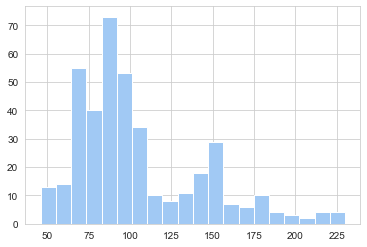

In [36]:
df["horsepower"].hist(bins=20)

In [37]:
# Get the Unique Car Name counts
df["car_name"].nunique()

305

Most of the car_names are unique. So there is no useful information in that column. Let's drop that column

In [38]:
df.drop("car_name" , axis=1, inplace= True)

In [39]:
# Drop the Origin column as we have derived the OriginCode for that respective feature
df.drop("origin" , axis=1, inplace= True)

df.rename(columns = {"origincode" : "origin"}, inplace=True)

In [40]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,mpg,brand,origin
0,8,307.0,130.0,3504.0,12.0,70,18.0,Chevrolet,India
1,8,350.0,165.0,3693.0,11.5,70,15.0,Buick,India
2,8,318.0,150.0,3436.0,11.0,70,18.0,Plymouth,India
3,8,304.0,150.0,3433.0,12.0,70,16.0,Amc,India
4,8,302.0,140.0,3449.0,10.5,70,17.0,Ford,India


##### Correlation of data


In [41]:
df.corr()

,displacement,horsepower,weight,acceleration,model_year,mpg
displacement,1.000000,0.896334,0.932824,-0.543684,-0.370164,-0.804203
horsepower,0.896334,1.000000,0.863053,-0.687740,-0.413533,-0.773662
weight,0.932824,0.863053,1.000000,-0.417457,-0.306564,-0.831741
acceleration,-0.543684,-0.687740,-0.417457,1.000000,0.288137,0.420289
model_year,-0.370164,-0.413533,-0.306564,0.288137,1.000000,0.579267
mpg,-0.804203,-0.773662,-0.831741,0.420289,0.579267,1.000000


### 1.5 Data visualization

#### Plots for categorical features
1. Number of cars belong to each Origin(country)

<AxesSubplot:title={'center':'Number of cars according to Origin'}, xlabel='origin', ylabel='count'>

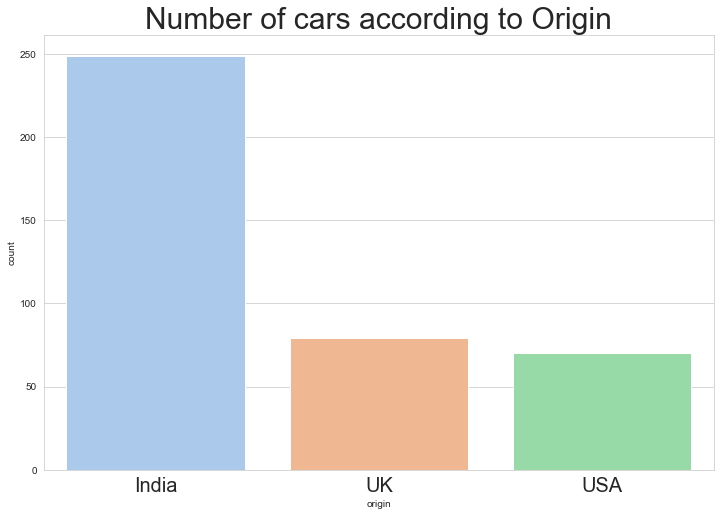

In [42]:
plt.figure(figsize=(12,8))
plt.title("Number of cars according to Origin",fontsize=30)
plt.xticks(fontsize=20)
sns.countplot(df["origin"])

India has the most number of cars

UK and USA have almost same number of cars.

2. Number of cars belong to Total number of Cylinders present

<AxesSubplot:title={'center':'Number of cars according to Total no. of Cylinders present'}, xlabel='cylinders', ylabel='count'>

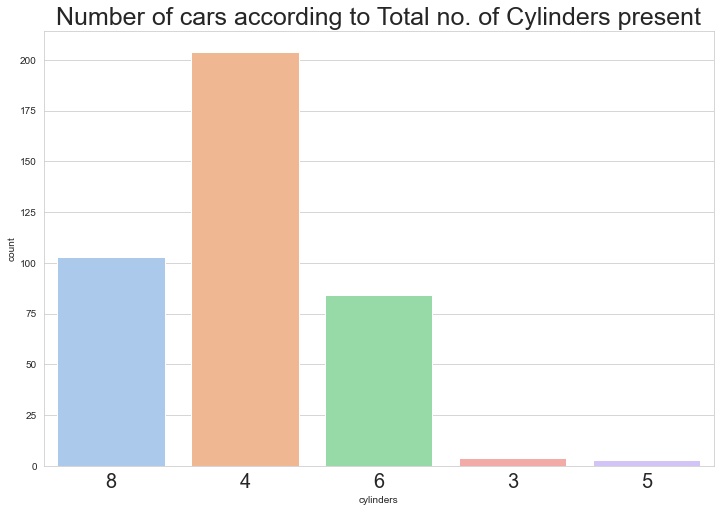

In [43]:
plt.figure(figsize=(12,8))
plt.title("Number of cars according to Total no. of Cylinders present",fontsize=25)
plt.xticks(fontsize=20)
sns.countplot(df["cylinders"])

Cars with 4 cylinders have the most number of cars

Cars with 3 and 5 cyliners have the least number of cars

3. Number of cars belong to Total number of Cylinders present in each Origin(country)

<AxesSubplot:title={'center':'Total number of cars according to Number of Cylinders in each Origin'}, xlabel='cylinders', ylabel='count'>

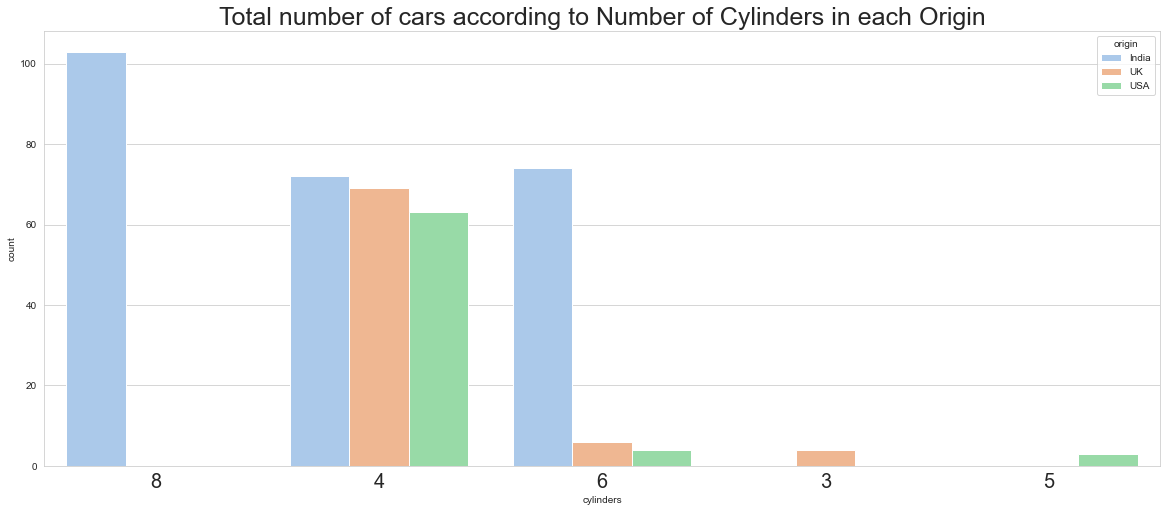

In [44]:
plt.figure(figsize=(20,8))
plt.title("Total number of cars according to Number of Cylinders in each Origin",fontsize=25)
plt.xticks(fontsize=20)
sns.countplot(x="cylinders",data=df,hue="origin")

Only India cars have 8 cylinders

Similarly Ony UK cars have 3 cylinders and USA cars have 5 cylinders

Most common number of cylinders is 4

4. Number of cars belong to each Model year

<AxesSubplot:title={'center':'Total number of cars according to Model year'}, xlabel='model_year', ylabel='count'>

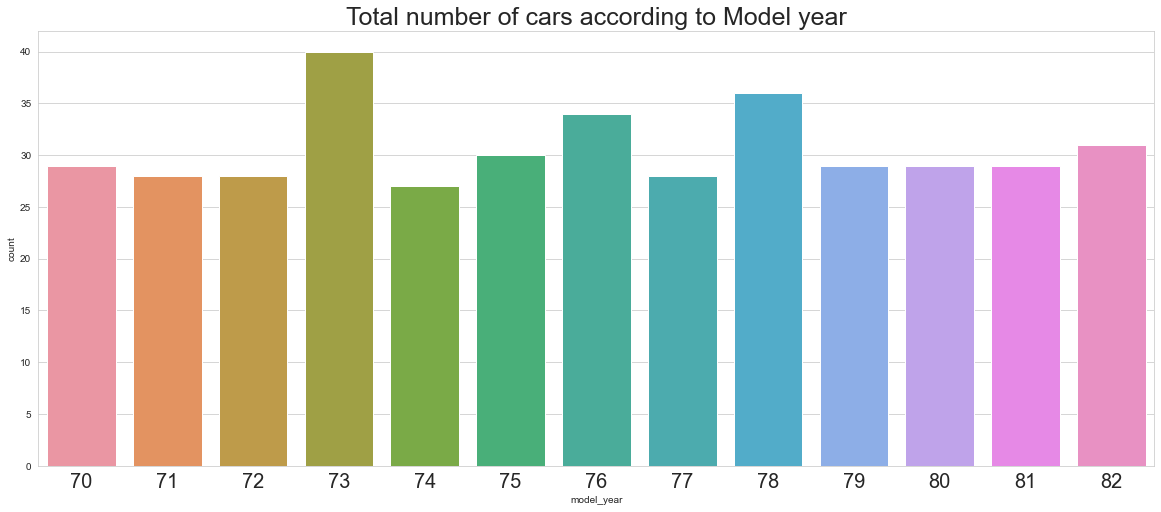

In [45]:
plt.figure(figsize=(20,8))
plt.title("Total number of cars according to Model year",fontsize=25)
plt.xticks(fontsize=20)

sns.countplot(df["model_year"])

5. Number of cars according to brand in Top 20 cars with highest mpg

<AxesSubplot:title={'center':'Number of cars according to brand in Top 20 cars with highest mpg'}, xlabel='brand', ylabel='count'>

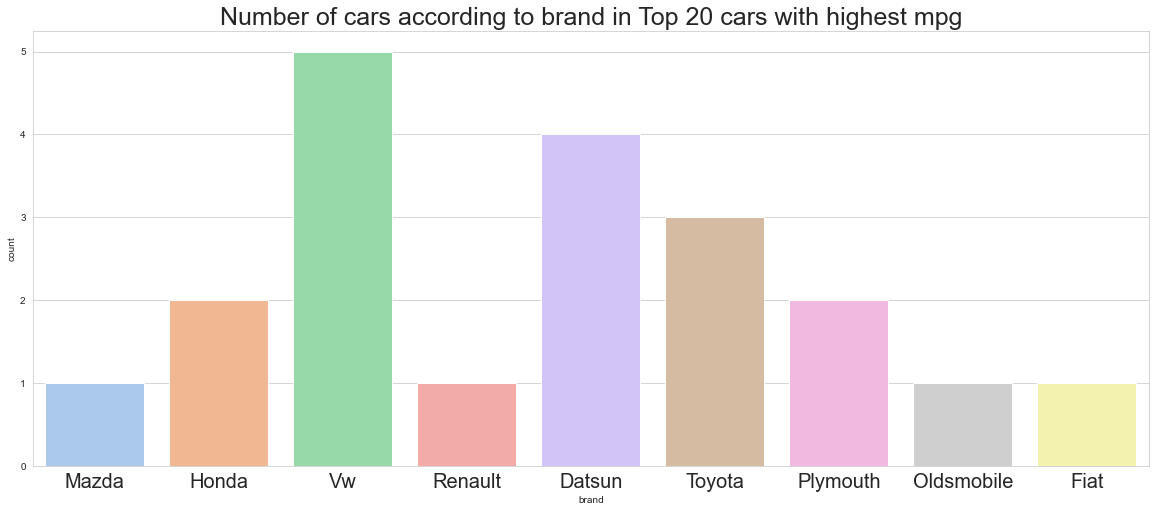

In [46]:
plt.figure(figsize=(20,8))
plt.title("Number of cars according to brand in Top 20 cars with highest mpg",fontsize=25)
plt.xticks(fontsize=20)

sns.countplot(df.sort_values(by="mpg",ascending=False)["brand"][:20])

6.Average mpg values of cars in each cylinders from each origin

<AxesSubplot:title={'center':'MPG values according to Number of Cylinders'}, xlabel='cylinders', ylabel='mpg'>

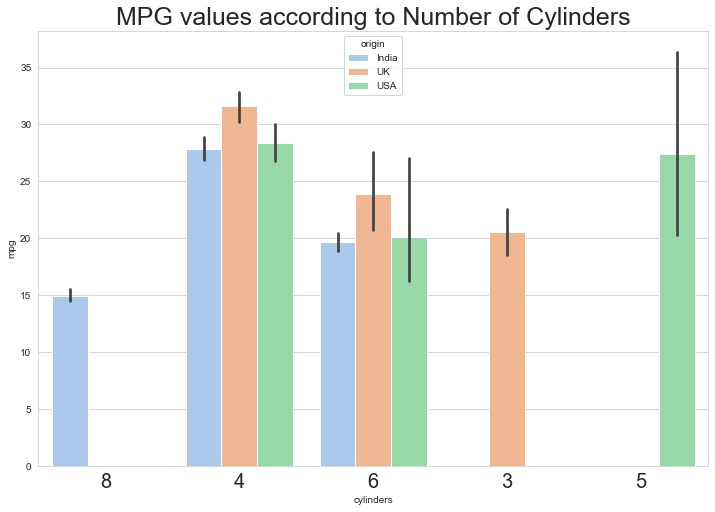

In [47]:
plt.figure(figsize=(12,8))
plt.title("MPG values according to Number of Cylinders",fontsize=25)
plt.xticks(fontsize=20)
sns.barplot(x="cylinders",y="mpg",data=df,hue="origin")

Cars with 8 cylinders has the least Average MPG value and Cars with 4 cylinders has the most Average MPG

#### 2. Joint plots

<Figure size 864x576 with 0 Axes>

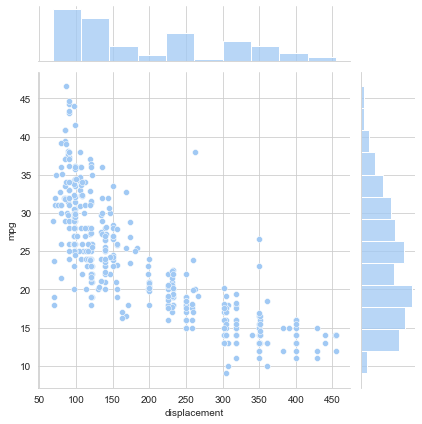

<Figure size 864x576 with 0 Axes>

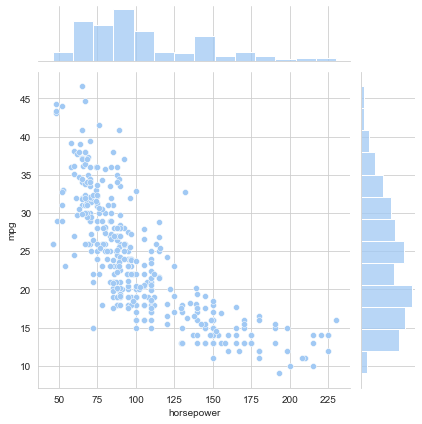

<Figure size 864x576 with 0 Axes>

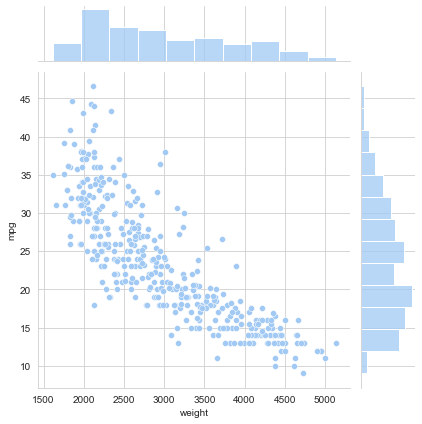

<Figure size 864x576 with 0 Axes>

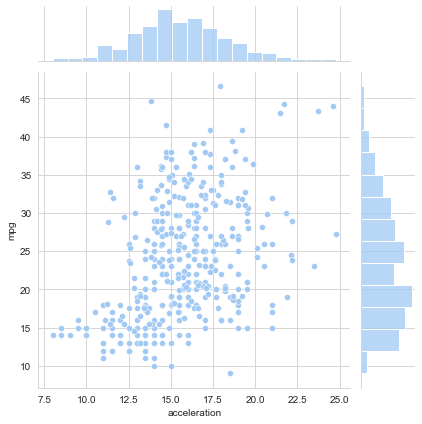

In [48]:
feature_num = ["displacement", "horsepower","weight","acceleration"]

for feature in feature_num:    
    plt.figure(figsize=(12,8))    
    sns.jointplot(feature,"mpg",df)
    

1. As we see MPG value decreases as we increase weight or displacement or horsepower of car

2. Mpg value only increases slightly when we increase Acceleration of car

### 2. Data Preprocessing

In [49]:

#df["cylinders"] = df["cylinders"].astype(int)
#df["model_year"] = df["model_year"].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    object 
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    float64
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   mpg           398 non-null    float64
 7   brand         398 non-null    object 
 8   origin        398 non-null    object 
dtypes: float64(5), int64(1), object(3)
memory usage: 28.1+ KB


In [50]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,mpg,brand,origin
0,8,307.0,130.0,3504.0,12.0,70,18.0,Chevrolet,India
1,8,350.0,165.0,3693.0,11.5,70,15.0,Buick,India
2,8,318.0,150.0,3436.0,11.0,70,18.0,Plymouth,India
3,8,304.0,150.0,3433.0,12.0,70,16.0,Amc,India
4,8,302.0,140.0,3449.0,10.5,70,17.0,Ford,India


In [51]:
X = df.drop("mpg", axis= 1)
y = df["mpg"]

print("X Shape:", X.shape)
print("Y Shape:" ,y.shape)

X Shape: (398, 8)
Y Shape: (398,)


#### Encoding Categorical Data
##### OneHotEncoding

1.origin 

2.cylinders 

In [52]:
##one hot encoding
#X = pd.get_dummies(X, columns=["origin","cylinders"])
#X.head()

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[("trf1",OneHotEncoder(),["cylinders", "origin"])],
                    remainder="passthrough")


In [54]:
x_s=np.array(ct.fit_transform(X))
x_s

array([[0.0, 0.0, 0.0, ..., 12.0, 70, 'Chevrolet'],
       [0.0, 0.0, 0.0, ..., 11.5, 70, 'Buick'],
       [0.0, 0.0, 0.0, ..., 11.0, 70, 'Plymouth'],
       ...,
       [0.0, 1.0, 0.0, ..., 11.6, 82, 'Dodge'],
       [0.0, 1.0, 0.0, ..., 18.6, 82, 'Ford'],
       [0.0, 1.0, 0.0, ..., 19.4, 82, 'Chevrolet']], dtype=object)

#### LabelEncoding

3.model_year x[:,12]

4.Brand x[:,13]

In [55]:
le_brand=LabelEncoder()
le_year=LabelEncoder()

x_s[:,13]=le_brand.fit_transform(x_s[:,13].astype(str))
x_s[:,12]=le_year.fit_transform(x_s[:,12])
x_s[:2]

array([[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 307.0, 130.0, 3504.0,
        12.0, 0, 5],
       [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 350.0, 165.0, 3693.0,
        11.5, 0, 3]], dtype=object)

In [56]:
newdata=pd.DataFrame(x_s,columns=["cy_3","cy_4","cy_5","cy_6","cy_8","India","UK","USA","displacement","horsepower","weight","acceleration","model_year","brand"])
newdata.head()

,cy_3,cy_4,cy_5,cy_6,cy_8,India,UK,USA,displacement,horsepower,weight,acceleration,model_year,brand
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,307.0,130.0,3504.0,12.0,0,5
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,350.0,165.0,3693.0,11.5,0,3
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,318.0,150.0,3436.0,11.0,0,19
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,304.0,150.0,3433.0,12.0,0,0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,302.0,140.0,3449.0,10.5,0,10


##### ColumnTransformer Technic

In [57]:
# Column transformer and Machine Learning pipeline
trans = ColumnTransformer(transformers=[
    ('trf1',OneHotEncoder(),["origin","cylinders"]),
    ('trf2',OrdinalEncoder(),["model_year","brand"])
    #('trf3',OrdinalEncoder(),["brand"])
    #('trf2',OrdinalEncoder(categories=[['c3','c4','c5','c6','c8']]),['cylinders']),
     ],remainder='passthrough')



In [58]:
X_s=np.array(trans.fit_transform(X))

In [59]:
X_s.shape

(398, 14)

In [60]:
scaled_df = pd.DataFrame(X_s,columns=["cy_3","cy_4","cy_5","cy_6","cy_8","India","UK","USA","displacement","horsepower","weight","acceleration","model_year","brand"])
scaled_df.sample(10)

,cy_3,cy_4,cy_5,cy_6,cy_8,India,UK,USA,displacement,horsepower,weight,acceleration,model_year,brand
341,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.0,5.0,173.0,110.0,2725.0,12.6
163,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,19.0,225.0,95.0,3785.0,19.0
110,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,7.0,108.0,94.0,2379.0,16.5
304,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,9.0,9.0,91.0,69.0,2130.0,14.7
323,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10.0,8.0,156.0,105.0,2800.0,14.4
86,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,304.0,150.0,3672.0,11.5
41,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,19.0,318.0,150.0,4096.0,13.0
198,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,12.0,91.0,53.0,1795.0,17.4
137,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,350.0,150.0,4699.0,14.5
371,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12.0,8.0,135.0,84.0,2525.0,16.0


The first eight columns have binary values

The last two columns have labelled values

### Data Sampling using stratified sampling

saw how the data is distributed over each category of the Cylinder column. We’re using the Cylinder column to create the strata

In [61]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["cylinders"]):
    start_train_set = df.loc[train_index]
    start_test_set = df. loc[test_index]
    
print("Train:", start_train_set.shape)
print("Test:",start_test_set.shape)

Train: (318, 9)
Test: (80, 9)


### Train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.3, random_state=101)

print("X Train", X_train.shape)
print("X Test", X_test.shape)
print("Y Train", y_train.shape)
print("Y Test", y_test.shape)

X Train (278, 14)
X Test (120, 14)
Y Train (278,)
Y Test (120,)


### Feature Scaling

In [63]:
X_train.head()

,cy_3,cy_4,cy_5,cy_6,cy_8,India,UK,USA,displacement,horsepower,weight,acceleration,model_year,brand
41,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,19.0,318.0,150.0,4096.0,13.0
31,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,24.0,113.0,95.0,2228.0,14.0
269,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0,8.0,105.0,75.0,2230.0,14.5
32,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,10.0,98.0,83.0,2046.0,19.0
259,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,15.0,200.0,85.0,3070.0,16.7


In [64]:
stdScalar = StandardScaler()

In [65]:
X_train_scaled = X_train
X_test_scaled = X_test

col_scale = ["horsepower", "weight", "acceleration", "model_year", "brand"]

X_train_scaled[col_scale] = stdScalar.fit_transform(X_train[col_scale])
X_test_scaled[col_scale] = stdScalar.fit_transform(X_test[col_scale])

In [66]:
X_train_scaled

,cy_3,cy_4,cy_5,cy_6,cy_8,India,UK,USA,displacement,horsepower,weight,acceleration,model_year,brand
41,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.851061,1.259678,1.213723,1.367541,-0.947764
31,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.473679,-0.751361,-0.237468,-0.870094,-0.585245
269,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0,-0.518699,-0.829840,-0.765173,-0.867699,-0.403986
32,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.269652,-0.898510,-0.554091,-1.088108,1.227346
259,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.352966,0.102105,-0.501321,0.138519,0.393554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.975584,2.064094,1.873356,1.713728,-1.310282
326,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,10.0,1.847250,-0.976989,-1.477576,-0.741921,2.931183
337,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,10.0,-0.020605,-0.810220,-0.844329,-0.795826,0.502310
11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.851061,1.475497,1.477576,0.784175,-2.760356


### Machine Learning Models - Train, Evaluate
#### Selecting and Training Machine Learning Models
Since this is a regression problem, I chose to train the following models:

1. Linear Regression
2. Decision Tree Regressor
3. Random Forest Regressor
4. SVM Regressor
5. KNeighbors Regressor
6. Lasso 
7. Ridge
8. ElasticNet

It’s a simple 4-step process:

1. Create an instance of the model class.
2. Train the model using the fit() method.
3. Make predictions by first passing the data through pipeline transformer.
4. Evaluating the model using Root Mean Squared Error (typical performance metric for regression problems) and R2 Score

##### Train and Evaluate Models with default params and compuete the MSE and R2 Score

In [67]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

models = [LinearRegression, SVR, KNeighborsRegressor, DecisionTreeRegressor, RandomForestRegressor, Lasso, Ridge, ElasticNet]
model_names = ['Linear_Regression', 'SVR_Regressior','KNN', 'Decision_Tree', 'Random_Forest', 'Lasso', 'Ridge', 'ElasticNet']
mseScore = []
r2scores = []

for i, model in enumerate(models):
    regressor = model()
    regressor.fit(X_train, y_train)
    #acc = round(regressor.r2_score(X_test, y_test)*100, 2)
    pred_y = regressor.predict(X_test)
    mse = np.sqrt(mean_squared_error(y_test,pred_y))
    r2=r2_score(y_test,pred_y)*100
    mseScore.append(mse)
    r2scores.append(r2)
   
    
table = pd.DataFrame({'Model': model_names, 'MSE': mseScore, 'R2_Score': r2scores}).sort_values(by='R2_Score', ascending=False)
table



,Model,MSE,R2_Score
4,Random_Forest,2.475028,90.225843
2,KNN,2.985858,85.774832
6,Ridge,3.038363,85.270148
0,Linear_Regression,3.044556,85.210039
1,SVR_Regressior,3.396681,81.591066
3,Decision_Tree,3.762457,77.412806
5,Lasso,3.778070,77.224956
7,ElasticNet,3.959486,74.985217


#### Support Vector Regression

##### Scaling y values

In [68]:
sc_y=StandardScaler()

ys_train=sc_y.fit_transform(y_train.values.reshape(-1,1))

ys_test=sc_y.transform(y_test.values.reshape(-1,1))

In [69]:
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled,ys_train)

SVR()

In [70]:
pred_svr = svr.predict(X_test_scaled)

P_svr=sc_y.inverse_transform(pred_svr)

In [71]:
svr_mse = np.sqrt(mean_squared_error(y_test,P_svr))
print("SVR MSE: ", svr_mse)

svr_r2 = r2_score(y_test,P_svr)*100
print("SVR R2 Score: ", svr_r2)

SVR MSE:  2.715559380684578
SVR R2 Score:  88.23375784051673


#### Random Forest Regression

In [72]:
rfr = RandomForestRegressor(n_estimators=100,random_state=101)
rfr.fit(X_train,y_train)


RandomForestRegressor(random_state=101)

In [73]:
pred_rfr = rfr.predict(X_test)

In [74]:
rf_mse = np.sqrt(mean_squared_error(y_test,pred_rfr))
print("RF MSE: ", rf_mse)

rf_r2 = r2_score(y_test,pred_rfr)*100
print("RF R2 Score: ", rf_r2)

RF MSE:  2.4589693284653484
RF R2 Score:  90.35226429010316


### Cross-Validation and Hyperparameter Tuning using

Scikit-Learn’s K-fold cross-validation feature randomly splits the training set into K distinct subsets called folds. Then it trains and evaluates the model K times, picking a different fold for evaluation every time and training on the other K-1 folds.

The result is an array containing the K evaluation scores. Here’s how I did for 10 folds:

In [75]:
rfscores = cross_val_score(rfr, 
                         X_train, 
                         y_train, 
                         scoring="neg_mean_squared_error", 
                         cv = 10)
tree_reg_rmse_scores = np.sqrt(-rfscores)

print("RF CV RMSE Score:", tree_reg_rmse_scores)
print("RF CV RMSE Mean:", tree_reg_rmse_scores.mean())

RF CV RMSE Score: [2.60526383 2.90638228 4.34915579 2.63147643 2.27149318 2.02785384
 2.5102254  2.41459316 3.14276683 2.7886509 ]
RF CV RMSE Mean: 2.7647861631482096


The scoring method gives you negative values to denote errors. So while calculating the square root, we have to add negation explicitly.

Take the average of these scores:

In [76]:
svrscores = cross_val_score(svr, 
                         X_train, 
                         y_train, 
                         scoring="neg_mean_squared_error", 
                         cv = 10)
tree_reg_rmse_scores = np.sqrt(-svrscores)

print("RF CV RMSE Score:", tree_reg_rmse_scores)
print("RF CV RMSE Mean:", tree_reg_rmse_scores.mean())

RF CV RMSE Score: [2.80186496 3.7274795  3.02329778 3.55595994 3.52274242 3.02259992
 4.02515074 2.65160118 4.07671618 3.66212498]
RF CV RMSE Mean: 3.4069537589286716


#### Fine-Tuning Hyperparameters
After testing all the models, you’ll find that RandomForestRegressor has performed the best but it still needs to be fine-tuned.

We use GridSearchCV to find out the best combination of hyperparameters for the RandomForest model:

In [77]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=101)

grid_search = GridSearchCV(forest_reg, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           cv=10,
                          )

grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=101),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [78]:
print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Params: {'max_features': 8, 'n_estimators': 30}
Best Score: -8.489600301293358


In [79]:
results = pd.DataFrame(grid_search.cv_results_)
#results.head()

In [80]:
cv_score = grid_search.cv_results_

# printing all the parameters along with thier scores
for mean, params in zip(cv_score["mean_test_score"], cv_score["params"]):
    print(np.sqrt(-mean), params)

3.613758390658576 {'max_features': 2, 'n_estimators': 3}
3.2501445633294046 {'max_features': 2, 'n_estimators': 10}
3.114089176733171 {'max_features': 2, 'n_estimators': 30}
3.4664127908667055 {'max_features': 4, 'n_estimators': 3}
3.002133925804378 {'max_features': 4, 'n_estimators': 10}
3.027689228354202 {'max_features': 4, 'n_estimators': 30}
3.5939029547237054 {'max_features': 6, 'n_estimators': 3}
3.186006811788371 {'max_features': 6, 'n_estimators': 10}
3.033374964586303 {'max_features': 6, 'n_estimators': 30}
3.238114794006722 {'max_features': 8, 'n_estimators': 3}
3.009759781410959 {'max_features': 8, 'n_estimators': 10}
2.913691867938914 {'max_features': 8, 'n_estimators': 30}
3.690682912228112 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3.2085066558007105 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3.2913647641338706 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3.055520440995922 {'bootstrap': False, 'max_features': 3, 'n_estimators

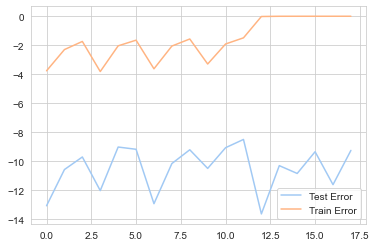

In [81]:
test_scores = grid_search.cv_results_['mean_test_score']
train_scores = grid_search.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='Test Error')
plt.plot(train_scores, label='Train Error')
plt.legend(loc='best')
plt.show()

In [82]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

In [83]:
#plot_grid_search(grid_search.cv_results_, n_estimators, max_features,'N Estimators', 'Max Features')

### Evaluating the entire system on Test Data

In [84]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_test_scaled)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print("Final RMSE:", final_rmse)

Final RMSE: 2.343001971988232


### Feature Importance



In [85]:
# feature importances from RandomForestRegressor
#feature_importances = rfr.feature_importances_

# feature importances from GridSearchCV
feature_importances = grid_search.best_estimator_.feature_importances_

Feature_importance=pd.DataFrame(feature_importances,index=["3","4","5","6","8","Europe","Japan","USA","displacement","horsepower","weight","acceleration","model_year","brand"])
Feature_importance[8:]

,0
displacement,0.117525
horsepower,0.012002
weight,0.294151
acceleration,0.268359
model_year,0.161567
brand,0.034181


We found that Fuel consumption of a car is mostly affected by Weight and acceleration of the car

In [86]:
results = pd.DataFrame({"Actual mpg":y_test,"Predicted mpg":np.round(pred_rfr,2)})
results

,Actual mpg,Predicted mpg
130,26.0,24.99
202,17.5,20.21
322,46.6,38.25
104,12.0,12.96
91,13.0,13.65
...,...,...
307,26.8,26.38
233,29.0,31.29
266,30.0,34.28
183,25.0,26.74
